# Jupyter formatting syntax
bold is ** before and after
italic is _ or * before and after
underline is < ins> < /ins>
adding an image in html: < img src="filename" align = "right/left/center" width=### height=### / >


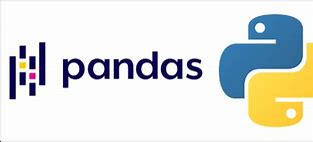
- Pandas is a data analysis library built on top of NumPy.
- Pandas provides data structures and operations for manipulating data using DataFrames
- DataFrames are multidimensional arrays with attached row and column labels.
- DataFrames can include heterogeneous types and/or missing data.
- Pandas also provides functions for handling data in a similar fashion to database frameworks and spreadsheet programs.



In [ ]:
# use NumPy and Pandas
import numpy as np
import pandas as pd
print("Pandas version is", pd.__version__)

# The Series Object
- A Pandas **Series** is a one-dimensional array of indexed data. It can be created from a list or array.
    - A Series wraps both a sequence of values and a sequence of indices, which can be used to access with the values and index attributes.
    - The values are simply a familiar NumPy array


In [ ]:
atad = pd.Series([0.52, 0.8, 0.63, 4.0], index = ['a', 'b', 'c', 'd'])
print(atad)
print()
print(atad.values)

# The Series Index
- The Series index is an array-like object of type pd.Index
    - Like with a NumPy array, data can be accessed by the associated index using square-bracket notation
    - The Pandas Series is much more general and flexible than the one-dimensional NumPy array that it emulates.


In [ ]:
data = pd.Series([0.25, 0.5, 0.79, 1.0])
data

In [ ]:
#index of the data series
data.index

In [ ]:
#the element at index 1
data[1]

In [ ]:
#a slice of a series (start:stop)
data[1:3]

# Python Dictionaries and Pandas Series
- A Pandas Series is similar to a specialized Python dictionary.
    - A dictionary maps arbitrary keys to a set of arbitrary values; a Series maps typed keys to a set of typed values.
    - The type information of a Pandas Series is much more efficient than Python dictionaries for certain operations.
- Construct a Series object directly from a Python dictionary:


In [ ]:
#create a dictionary of key:value pairs
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population_dict

In [ ]:
#create a Pandas series from a Python dictionary
population = pd.Series(population_dict)
population

In [ ]:
#notice the difference between printing the Python dictionary and printing the Pandas Series
#there is an implied for:each loop to print each element on a separate line.
print("Dictionary:")
print(population_dict)
print("\nSeries:")
print(population)


### Dictionary-style item access can be used with a Series:



In [ ]:
population['California']

- Unlike a dictionary, the Series also supports Numpy array-style operations such as slicing:

In [ ]:
population['California':'New York']

# Creating a Series
- Creating a Series is almost always some form of
            pd.Series(data, index = index)
- where index is an optional argument, and data can be one of many entities (e.g., list, dictionary, Numpy array).

In [ ]:
# simple scalar series
pd.Series([2, 4, 6])

In [ ]:
# scalar series, fill with 5's and specify index
pd.Series(5, index=[100, 200, 300])

In [ ]:
# simple dictionary-based series
pd.Series({2:'a', 1:'b', 3:'c'})

In [ ]:
# populate using only specified keys (by index)
print(pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]))

# DataFrames
- The DataFrame can also be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
- A DataFrame is comparable to a two-dimensional array with both flexible row indices and flexible column names.
- Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects.



### Construct a new area Series which parallels the population Series created earlier, then create a two-dimensional DataFrame using those objects

In [ ]:
#recall the population_dict from above
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

In [ ]:
#and the Pandas Series created from that dictionary
population = pd.Series(population_dict)
population

In [ ]:
#create a new area dictionary for the same states
area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}

In [ ]:
#create a Pandas Series from the area dictionary
area = pd.Series(area_dict)
area

In [ ]:
#create a DataFrame from the two Series
states = pd.DataFrame({'population': population,
                       'area': area})
states

### DataFrame attributes

- DataFrames have an index and a column attribute

In [ ]:
#index refers to the row headings
states.index

In [ ]:
states.columns

In [ ]:
#DataFrames use colum values as indices to a series
states['area']

### A DataFrame from a list of Dictionaries

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
data



In [ ]:
pd.DataFrame(data)

## Missing Values
- Missing values are filled with NaN ("not-a-number")
- This behavior is important; in data science missing values can impact analytical results and should be dealt with consistently
- https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b


In [ ]:
data=[{'a': 1, 'b': 2},
      {'b': 3, 'c': 4}]
data

In [ ]:
pd.DataFrame(data)

# A DataFrame from a 2D Array
- Given a two-dimensional array of data, a DataFrame can be created with any specified  column and index name.
    - If the names are omitted, an integer index will be used for each


In [ ]:
pd.DataFrame(np.random.rand(3, 2),
      columns=['foo', 'bar'],
      index=['a', 'b', 'c'])

# The Pandas Index is an Object
- Both the Series and DataFrame objects in Pandas contain an explicit index that lets you reference and modify data
- A Pandas Index is itself an object that may contain repeated values
- It can be thought of either as an immutable array or as an ordered set (technically a multiset -- a set which allows multiple instances of each of its elements)
- This has some interesting consequences in operations available on Index objects.


In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

## Array-like Behavior of a Pandas Index
- The Index object in many ways operates like an array.
    - Indexing notation to retrieve values or slices
    - Index objects have many of the attributes familiar from NumPy arrays


In [ ]:
ind[1]

In [ ]:
ind[::2]

## A Pandas Index is Immutable
- One difference between Index objects and NumPy arrays is that indices are immutable; they cannot be modified in place.
- This makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification.


In [ ]:
ind[1] = 0

## The Pandas Index as an Ordered Set
- Pandas objects are designed to facilitate operations such as joins across datasets
- The Index object follows many of the conventions used by Python’s built-in set data structure, so that unions, intersections, differences, and other combinations can be computed.


In [ ]:
#create two index objects
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
#indA & indB --> intersection: the & usage is deprecated, use the intersection method

indA.intersection(indB)


In [ ]:
# indA ^ indB --> symmetric difference ("exclusive OR"): the ^ usage is deprecated

indA.symmetric_difference(indB)

In [ ]:
# indA | indB  --> union: The | usage is deprecated

indA.union(indB)


# Series as a Dictionary
- Like a dictionary, the series object provides a mapping from a collection of keys to a collection of values

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a', 'b', 'c', 'd'])

In [ ]:
data

In [ ]:
data['b']

### We can use dictionary-like expressions and methods to examine keys/indices and values

In [ ]:
'a' in data

In [ ]:
data.keys()

In [ ]:
list(data.items())

### Series objects can even be modified with a dictionary-like syntax
- As a dictionary can be extended by assigning to a new key, extend a series by assigning a value to a new index

In [ ]:
data

In [ ]:
data['e'] = 1.25
data

# Series as a One-dimensional Array
- A series provides array-style item selection using the same basic mechanisms as NumPy array, including slices, masking, and fancy indexing

In [ ]:
#slicing by explicit index
#NOTE: includes last index!!

data['a':'c']


In [ ]:
#slicing by implicit integer index
#NOTE: does NOT include the last index!

data[0:2]

In [ ]:
#masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
#fancy indexing -- non-continuous
data[['a', 'e']]

# Indexers
### Pandas provides special <ins>indexer</ins> attributes that explicitly expose certain indexing schemes to help prevent confusion when indexing.

- Without using the indexers, given a specific index, indexing will use the Series index.
- Without using the indexers, slicing will use the Python-style index.


In [ ]:
data = pd.Series(['a', 'b', 'c'],
                 index=[1, 3, 5])


In [ ]:
# explicit index
print(data[1])

In [ ]:
# implicit index when slicing --> up to but not including the last index
print(data[0:2])

#### The loc attribute allows indexing and slicing that always references the explicit index

In [ ]:
data.loc[1]

#### The iloc attribute allows indexing and slicing that always references the implicit Python-style index

In [ ]:
data.iloc[1]

#### _The explicit nature of loc and iloc make them very useful in maintaining clean and readable code, especially in the case of integer indexes_

# DataFrame as Dictionary
- The individual series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})

In [ ]:
data

In [ ]:
data['area']

In [ ]:
#we can use attribute-style access with column names that are strings

data.area

In [ ]:
#use the **is** operator to compare identities of each object

data.area is data['area']

In [ ]:
#the pop method of a data frame
data.pop('area')


In [ ]:
data.columns

### Dictionary-style syntax can also be used to modify the DataFrame

In [ ]:
#first, add back the column that was popped previously

data['area'] = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
data

In [ ]:
#compute density and add the density column to the DataFrame

data['density'] = data['pop'] / data['area']

data

# DataFrame as a Two-dimensional (2D) array
- The DataFrame can be viewed as an enhanced two-dimensional array
 - View the underlying data array using the ndarray **values** attribute

In [ ]:
data.values

In [ ]:
data.values()

- Transpose the array using the **T** attribute


In [ ]:
data.T

-The dictionary-style indexing of columns precludes simple treatment of DataFrames as NumPy arrays
 - e.g. passing a single index to an Numpy array accesses a row, passing a single index to a DataFrame accesses a column


In [ ]:
#transpose again to put back into the original data frame
data.T

data

In [ ]:
data.values[0]

In [ ]:
np_data = data.to_numpy()

np_data

In [ ]:
np_data[0]

In [ ]:
data['area']

# Using Indexers with DataFrames
- As with Series, Pandas uses the loc and iloc indexers with DataFrames
 - Using iloc, the underlying array can be indexed as a simple NumPy array, but the DataFrame index and column labels are maintained in the result

In [ ]:
#the index goes up to, but does not include, the endpoints
data.iloc[:3, :2]


In [ ]:
#loc includes the endpoints
data.loc[:'Florida', :'area']


# Additional Indexing Conventions

- For DataFrames, indexing refers to <ins>columns</ins> and slicing refers to <ins>rows</ins>

In [ ]:
data['Florida':'Illinois']

- Rows can also be accessed using row numbers

In [ ]:
data[1:3]

-Direct masking operations are row-wise rather than column-wise

In [ ]:
data[data.density > 100]

# Index Preservation
- Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects


In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])

df

In [ ]:
newDF = 2 ** df

newDF

# Index Alignment in Series
- Pandas will align (combine) indices in the process of performing binary operations

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [ ]:
area

In [ ]:
population

-The result of a binary operation contains the union of indices of the two input objects
 - Any item for which one or the other does not have an entry is marked with NaN, or “Not a Number,” which is how Pandas marks missing data

In [ ]:
population / area

- If using NaN values is not the desired behavior, we can modify the fill value using appropriate object methods in place of the operators.


In [ ]:
# Instead of population / area, call this:
population.divide(area, fill_value=1.0)


# Index Alignment in DataFrames
- Index alignment takes place for both columns and indices when you are performing operations on DataFrames

In [ ]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

In [ ]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                 columns=list('BAC'))

B

In [ ]:
B + A

- Indices are sorted and aligned correctly irrespective of their order in the two objects
 - Notice in the combined DataFrame the columns are in alphabetical order


##### -  - - - - - - - - - - - - - - - - - - - - - - - -

- As with Series, the object’s arithmetic methods can be used to pass any desired fill_value in place of missing entries


In [ ]:
# calculate mean of all elements of A and use for fill
fill = A.stack().mean()

fill


In [ ]:
A

In [ ]:
B

In [ ]:
A.add(B, fill_value=fill)

# Handling Missing Values
- Real-world data is rarely clean and homogeneous
 - Many datasets will have missing data
- Different data sources may indicate missing data in different ways
 - Using a mask
  - as a separate Boolean array
  - as a single bit in the data representation
 - Using a sentinel value
  - a data-specific convention, e.g. for missing integers use –9999 or some rare bit pattern
  - NaN (Not a Number) for missing floating point values
   - NaN is part of the IEEE floating-point specification
- No universally common choice exists, different languages and systems use different conventions.
- Pandas uses sentinels for missing data, using two already-existing Python null values: the special floating-point NaN value, and the Python None object
 - This results in some side effects, but in practice is a good compromise.
- None is a "singleton" object – there can exist only one.
 - -- "The None keyword is used to define a null value, or no value at all. None is not the same as 0, False, or an empty string. None is a datatype of its own (NoneType) and only None can be None"
https://www.w3schools.com/python/ref_keyword_none.asp


# Using None in NumPy
- Because None is a Python object, it cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object' (i.e., arrays of Python objects).


In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1


In [ ]:
vals1.dtype

- dtype=object means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.
- Object arrays can be useful, but operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types
 - If you perform aggregations like sum() or min() across an array with a None value, you will generally get an error since operations between numbers and None are undefined


# Using NaN in NumPy
- The other missing data representation, NaN (acronym for Not a Number), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.
 - NaN is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.
- NumPy uses a native floating-point type for arrays containing NaN.
 - Unlike the object array from before, this array supports fast operations pushed into compiled code.


In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
vals2


In [ ]:
vals2.dtype

- "NaN is a bit like a data virus—it infects any other object it touches."
 - [VanderPlas, Python Data Science Handbook]
- NaN values will propagate through numeric operations
 - The result of arithmetic with a NaN will be another NaN


In [ ]:
1 + np.nan

In [ ]:
0 *  np.nan

- Using aggregate functions with NaN values does not result in errors, but the results aren't very useful


In [ ]:
vals2

In [ ]:
vals2.sum()

In [ ]:
vals2.min()

In [ ]:
vals2.max()

- NumPy provides special aggregations that will ignore these missing values:


In [ ]:
vals2

In [ ]:
np.nansum(vals2)

In [ ]:
np.nanmin(vals2)

In [ ]:
np.nanmax(vals2)

# NaN and None in Pandas
- Pandas is built to handle NaN and None nearly interchangeably, converting between them where appropriate



In [ ]:
pd.Series([1, np.nan, 2, None])

- When integer values are set to NaN or None, the data type is automatically up-cast to floating point
 - None is automatically converted to a NaN value


In [ ]:
x = pd.Series(range(2), dtype=int)

x

In [ ]:
x[0] = None

x

# Operating on Null Values
- There are several methods for detecting, removing, and replacing null values in Pandas data structures.
 - isnull()
 -- Generate a Boolean mask indicating missing values
 - notnull()
 -- Opposite of isnull()
 - dropna()
 -- Return a filtered version of the data
 - fillna()
 -- Return a copy of the data with missing values filled or imputed


# Detecting Null Values
- Using isnull()

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

data


In [ ]:
data.isnull()

- Boolean masks can be used to index Series or DataFrames

In [ ]:
data.notnull()

In [ ]:
data[data.notnull()]

# Dropping Null Values in Series
- The dropna() method returns a new Series without the nulls

In [ ]:
data



In [ ]:
data.dropna()

- By default, dropna() will drop full rows with any nulls


In [ ]:
df = pd.DataFrame([ [1,      np.nan, 2],
                    [2,      3,      5],
                    [np.nan, 4,      6]])

df

In [ ]:
df.dropna()


- axis='columns' drops all columns containing a null value


In [ ]:
df

In [ ]:
df.dropna(axis='columns')

- the thresh argument specifies a minimum drop threshold

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [8,      np.nan, np.nan],
                   [np.nan, np.nan, np.nan]])

df

In [ ]:
df.dropna(thresh=2)

# Filling Null Values in Series
- Pandas provides the fillna() method to replace the null values in a Series
 - fillna() returns a copy of the array with the null values replaced


In [ ]:
data = pd.Series([1, np.nan, 2, None, 3],
                 index=list('abcde'))
data


In [ ]:
data.fillna(0)

- Pandas provides the method argument with fillna() to specify how to fill the values
 - Choices are  ‘bfill’, ‘ffill’, and None (defaults to None)

In [ ]:
data


In [ ]:
print(data.fillna(method='ffill'))



In [ ]:
print(data.fillna(method='bfill'))

- Fillna() options for DataFrames are similar to Series
- An axis for fills can be specified
 - Choices are axis = 0 for index (default) and axis = 1 for column
 - If first value is NaN, subsequent fill does not occur


In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [8,      np.nan, np.nan],
                   [np.nan, 4,      6]])



In [ ]:
df


In [ ]:
newDf = df.fillna(method='ffill', axis=0)   # index fill



In [ ]:
newDf.fillna(method='ffill', axis=1)  # column fill